<a href="https://colab.research.google.com/github/schmuecker/machine-learning-course/blob/main/Deep%20Learning/01%20backpropagation/01%20MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1155]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray();

<Figure size 720x540 with 0 Axes>

In [1156]:
# 1.1

# Create training data
X_train = np.random.uniform(-6,6,(200,2))

#Create test data
X_test = np.random.uniform(-6,6,(200,2))

In [1157]:
# 1.2 
def classify(data):

  labels = []

  for item in data:
    label = 0
    if (item[0] < 0 and item[1] < 0):
      label = 0
    if (item[0] > 0 and item[1] > 0):
      label = 0
    if (item[0] < 0 and item[1] > 0):
      label = 1
    if (item[0] > 0 and item[1] < 0):
      label = 1
    
    labels.append(label)

  return labels

# Training labels
y_train = classify(X_train)

# Test labels
y_test = classify(X_test)

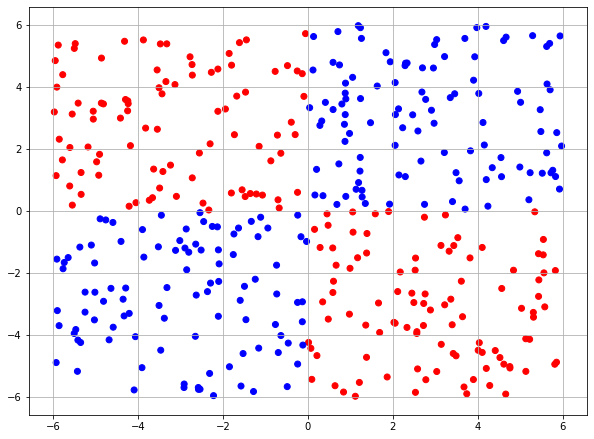

In [1158]:
# 1.3 Scatter plot

def get_colors(data):
  colors = []
  for y in data:
    if (y == 0):
      colors.append('b')
    if (y == 1):
      colors.append('r')
  return colors

plt.scatter(X_train[:,0], X_train[:,1], c=get_colors(y_train))
plt.scatter(X_test[:,0], X_test[:,1], c=get_colors(y_test))

In [1159]:
# 1.4 
# Weight vector has the shape (2, 1) 
# because we have 2 output neurons and 0 hidden neurons

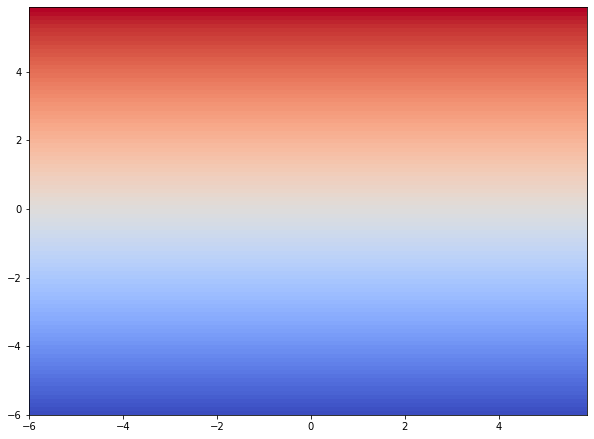

In [1160]:
# 1.5

weights_x = [1,0]
weights_y = [0,1]
weights_in = np.array([weights_x, weights_y])

# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))
    #tanH nur für Aufgabe 3 benötigt Anpassung in evaluate
    #return np.tanh(z)

def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    a = np.dot(weights_in, a)
    return a

xGitter = np.zeros((100,100))
yGitter = np.zeros((100,100))
outputs_gitter = np.zeros((100, 100, 2))
xIndex = 0
yIndex = 0
h = 12/100
for x in np.arange(-6,6,h):
    for y in np.arange(-6,6,h):
        input = feedforward([x,y])
        xGitter[xIndex][yIndex] = input[0]
        yGitter[xIndex][yIndex] = input[1]
        outputs_gitter[xIndex][yIndex] = input
        yIndex += 1
    yIndex = 0
    xIndex += 1


xx, yy = np.meshgrid(np.arange(-6,6,h), np.arange(-6,6,h))

plt.pcolor(xx, yy, xGitter, alpha=1.0, cmap='coolwarm')

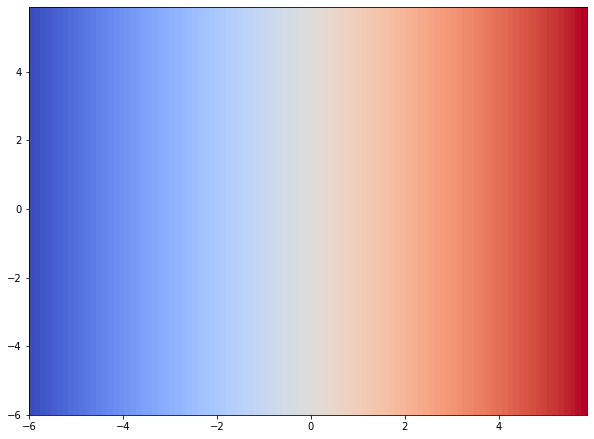

In [1161]:
plt.pcolor(xx, yy, yGitter, alpha=1.0, cmap='coolwarm')

In [1162]:
# 1.6

outputs_t = []
outputs_te = []

for xy in X_train:
  output = feedforward(xy)
  outputs_t.append(output)

for xy in X_test:
  output = feedforward(xy)
  outputs_te.append(output)

y_train = np.reshape(y_train,(200,1))
y_test = np.reshape(y_test,(200,1))


In [1163]:
len(outputs_gitter[0])
gitter_flat = []
for x in range(len(outputs_gitter)):
  for y in range(len(outputs_gitter[x])):
      gitter_flat.append(outputs_gitter[x][y])
df_gitter = pd.DataFrame(gitter_flat)
df_gitter

,0,1
0,-6.00,-6.00
1,-6.00,-5.88
2,-6.00,-5.76
3,-6.00,-5.64
4,-6.00,-5.52
...,...,...
9995,5.88,5.40
9996,5.88,5.52
9997,5.88,5.64
9998,5.88,5.76


Globale Arrays und Variablen des Netzwerkes:

In [1164]:
# 2.1

# Netzwerkparameter
mbs = 10                       # Größe der Minibatches
eta = 1                        # Lernrate
no_hidden_L2 = 2               # Anzahl versteckter Neuronen Layer 2
no_hidden_L3 = 2               # Anzahl versteckter Neuronen Layer 3
epochs = 300                  # Anzahl Epochen
sizes = [2, no_hidden_L2, no_hidden_L3, 1] # 4-schichtiges MPL mit 2 Eingangs-, 4 versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
print(weights[1].shape)

(2, 2)


In [1165]:
# 2.2

def feedforward_2(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_array = []
    ypred_array = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward_2(x)
        ypred_array.append(ypred[0])
        y_array.append(y[0])
        
        
        # Label ist in one-hot-Codierung: korrekte Klasse ist 1, alle anderen 0
        if y <= 0.5:
          c = 0
        else:
          c = 1
        
        # Index des maximal aktivierten Outputs ist die Entscheidung des Netzwerk
        if ypred <= 0.5:
          cpred = 0
        else:
          cpred = 1
        '''
        # Label ist in one-hot-Codierung: korrekte Klasse ist 1, alle anderen 0
        #für Aufgabe 3 mit tanh()
        if y <= 0:
          c = -1
        else:
          c = 1
        
        # Index des maximal aktivierten Outputs ist die Entscheidung des Netzwerk
        #für Aufgabe 3 mit tanh()
        if ypred <= 0:
          cpred = -1
        else:
          cpred = 1
        '''
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1

        
    mse = np.nan_to_num(mean_squared_error(y_array, ypred_array))

    return correct, mse
  
correct, mse = evaluate(np.array(outputs_t), y_train)

print(len(X_test))
print("---")
print(correct)
print("mse: "+str(mse))

200
---
107
mse: 0.39505360957637825


Einige Hilfsfunktionen:

In [1166]:
# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return np.nan_to_num((1-y)/(1-output_activations)-y/output_activations)
    #return (output_activations-y)



Backpropagation-Algorithmus für ein Paar aus Input x und Label y:

In [1167]:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    #
    #
    #
    # HIER NOCH DIE SHAPE VON Y AUSGEBEN!! IRGENDWAS IST BEI DER AUFGABE 4 von nicht ganz richtig damit loss muss bei 25 anfangen 
    #
    #
    #
    #
    #
    #
    #
    #




    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = sigmoid_prime(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

Gemitteltes Update über einen Minibatch:

In [1168]:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

Stochastischer Gradientenabstieg:

In [1169]:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
          
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        
        # Gib Performance aus
        acc_val[j], mse[j] = evaluate(x2, y2)
        print("Epoch {0}: {1} / {2}".format(j, acc_val[j], n_test))
    
    return acc_val, mse

Epoch 0: 125.0 / 200
Epoch 1: 113.0 / 200
Epoch 2: 104.0 / 200
Epoch 3: 100.0 / 200
Epoch 4: 120.0 / 200
Epoch 5: 127.0 / 200
Epoch 6: 123.0 / 200
Epoch 7: 123.0 / 200
Epoch 8: 131.0 / 200
Epoch 9: 111.0 / 200
Epoch 10: 130.0 / 200
Epoch 11: 118.0 / 200
Epoch 12: 137.0 / 200
Epoch 13: 123.0 / 200
Epoch 14: 133.0 / 200
Epoch 15: 129.0 / 200
Epoch 16: 128.0 / 200
Epoch 17: 131.0 / 200
Epoch 18: 128.0 / 200
Epoch 19: 115.0 / 200
Epoch 20: 136.0 / 200
Epoch 21: 136.0 / 200
Epoch 22: 141.0 / 200
Epoch 23: 131.0 / 200
Epoch 24: 130.0 / 200
Epoch 25: 141.0 / 200
Epoch 26: 134.0 / 200
Epoch 27: 150.0 / 200
Epoch 28: 142.0 / 200
Epoch 29: 122.0 / 200
Epoch 30: 137.0 / 200
Epoch 31: 135.0 / 200
Epoch 32: 141.0 / 200
Epoch 33: 134.0 / 200
Epoch 34: 141.0 / 200
Epoch 35: 140.0 / 200
Epoch 36: 139.0 / 200
Epoch 37: 132.0 / 200
Epoch 38: 143.0 / 200
Epoch 39: 138.0 / 200
Epoch 40: 138.0 / 200
Epoch 41: 137.0 / 200
Epoch 42: 138.0 / 200
Epoch 43: 134.0 / 200
Epoch 44: 135.0 / 200
Epoch 45: 140.0 / 20

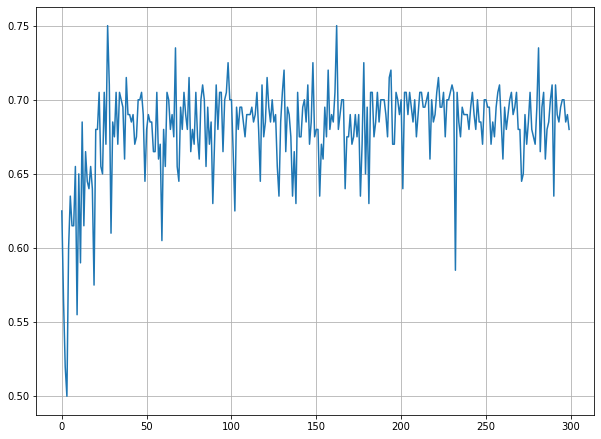

In [1170]:
# 2.3
# outputs_t (x2) has shape (200,2)
# wird reshaped zu (2,1)
acc_val_xy, mse_xy = SGD(np.array(outputs_t), y_train, epochs, mbs, eta, np.array(outputs_te), y_test)
#print("accval:")
#print(acc_val_xy)
#print(mse_xy)
#plt.plot(acc_val_xy, color = "blue")
plt.plot(acc_val_xy/np.array(outputs_te).shape[0]);

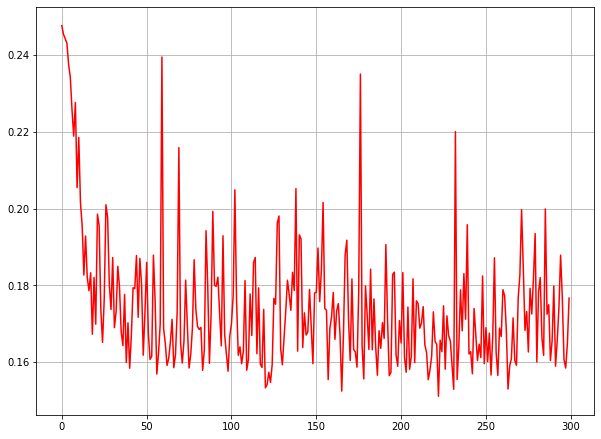

In [1171]:
plt.plot(mse_xy, color = "red")

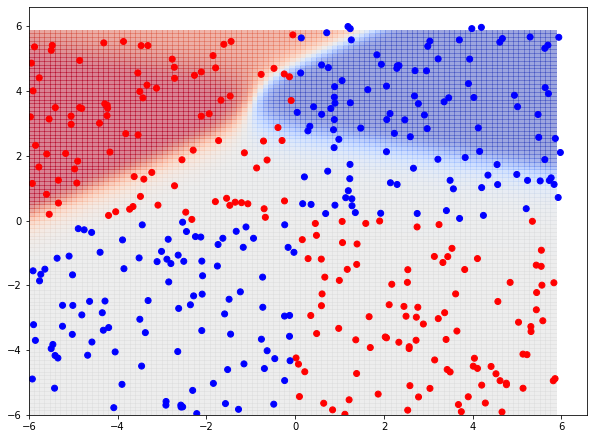

In [1172]:
# 2.4

def get_colors(data):
  colors = []
  for y in data:
    if (y <= 0.5):
      colors.append('b')
    if (y > 0.5):
      colors.append('r')
  return colors

classes = np.zeros((100,100))
h = 12/100

for ridx, row in enumerate(np.arange(-6,6,h)):
  for cidx, xy in enumerate(np.arange(-6,6,h)):
    data = np.array([row, xy] , dtype='float64')
    x = np.reshape(data,(2,1)).copy()
    output = feedforward_2(x)
    classes[ridx][cidx] = output[0][0]

plt.pcolor(xx, yy, classes, alpha=0.5, cmap='coolwarm')

plt.scatter(X_train[:,0], X_train[:,1], c=get_colors(y_train))
plt.scatter(X_test[:,0], X_test[:,1], c=get_colors(y_test))

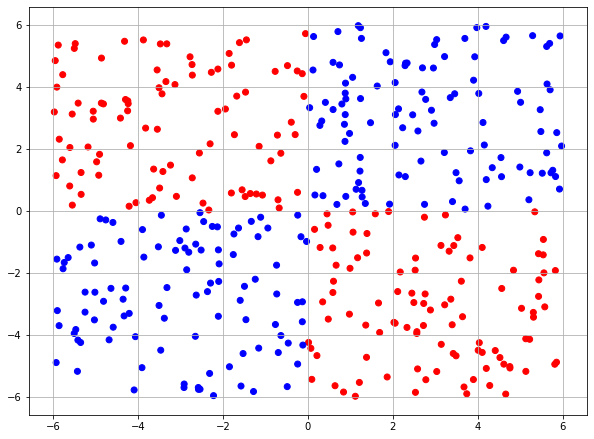

In [1173]:
# 2.4 Scatter plot

def get_colors(data):
  colors = []
  for y in data:
    if (y == 0):
      colors.append('b')
    if (y == 1):
      colors.append('r')
  return colors

plt.scatter(X_train[:,0], X_train[:,1], c=get_colors(y_train))
plt.scatter(X_test[:,0], X_test[:,1], c=get_colors(y_test))


Training:

In [1174]:
#acc_val = SGD(x0, y0, epochs, mbs, eta, x2, y2)

Evaluation auf den unabhängigen Testdaten:

In [1175]:
#print("Test accuracy: {0} / {1}".format(evaluate(x1, y1), x1.shape[0]))

Lernkurve (Genauigkeit auf Validierungsdatensatz):

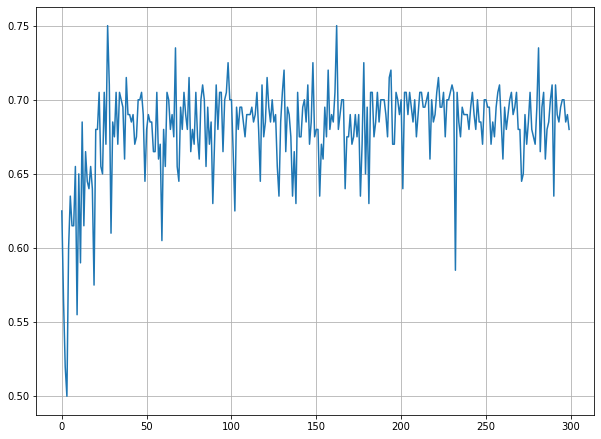

In [1176]:
plt.plot(acc_val_xy/np.array(outputs_te).shape[0]);